# Practical 4
# Decision Tree Part 1
# Name- Om Gatlewar
# Roll No-55

# Import Libraries

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Import Dataset

In [2]:
pd.set_option('display.max_rows', None)
d1=pd.read_csv('Diabetes.csv')
print(d1)
d1.info()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             

# Explore Data

In [3]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
d1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
d2=d1.loc[(d1['Glucose']!=0) & (d1['BloodPressure']!=0) & 
           (d1['SkinThickness']!=0) & (d1['Insulin']!=0) & (d1['BMI']!=0)]

In [6]:
d2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
d1['Glucose'].replace(0,d2['Glucose'].mean(),inplace=True)
d1['BloodPressure'].replace(0,d2['BloodPressure'].mean(),inplace=True)
d1['SkinThickness'].replace(0,d2['SkinThickness'].mean(),inplace=True)
d1['Insulin'].replace(0,d2['Insulin'].mean(),inplace=True)
d1['BMI'].replace(0,d2['BMI'].mean(),inplace=True)

In [8]:
d1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.692888,72.325800,29.151052,155.795560,32.466469,0.471876,33.240885,0.348958
std,3.369578,30.436043,12.101807,8.790943,85.021487,6.875558,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.145408,156.056122,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.056122,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Splitting Dataset

In [9]:
x=d1.iloc[:,0:8]
y=d1.iloc[:,8]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


# Creating Classification Model

In [12]:

DC=DecisionTreeClassifier()

DC=DC.fit(x_train,y_train)
y_pred=DC.predict(x_test)

In [13]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0
 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 0]


In [14]:
d2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
d2.head()

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0


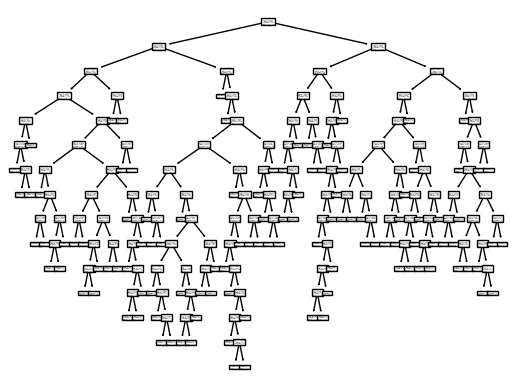

In [15]:
tree.plot_tree(DC)
plt.savefig('o1.pdf')

# Model Evaluation Metrics

In [16]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.7337662337662337


In [17]:
cf=confusion_matrix(y_test,y_pred)

In [18]:
print(cf)

[[77 22]
 [19 36]]


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



Accuracy = (TP+TN) / (TP+FP+TN+FN)

Precision tells us how many of the correctly predicted cases turned out to be positive.

Precision= TP / (TP+FP)


Recall tells us how many of the actual positive cases we were able to predict correctly with our model. 
Recall =  TP / (TP+FN)
                                        
F1 Score = 2 / ( (1/Recall) + (1/Precision) )

Support is the number of actual occurrences of the class in the specified dataset.


# KFold Cross Validation

In [20]:
x=d1.iloc[:,0:8]
y=d1.iloc[:,8]

In [21]:
DC=DecisionTreeClassifier()

In [22]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold
from sklearn import model_selection
kf = KFold(n_splits=5)
cv_results = model_selection.cross_val_score(DC, x, y, cv=kf)

In [23]:
print(cv_results)

[0.68181818 0.62337662 0.75974026 0.76470588 0.73202614]


In [24]:
print(cv_results.mean())

0.7123334182157712
